# Team Members:  
- Vrushali Koli
- Bryan Patrick Cullano 
- Nehali Parulekar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Data Exploration

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Let's see how many columns have null values

In [5]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na.sort_values(ascending=False)[:3]

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

<AxesSubplot:>

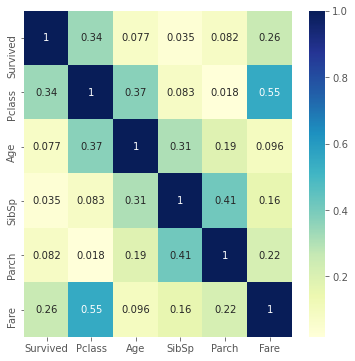

In [6]:
plt.figure(figsize=(6, 6))
sns.heatmap(abs(train.drop('PassengerId', axis=1).corr()), annot=True, cmap='YlGnBu')

## Check Feature Distribution

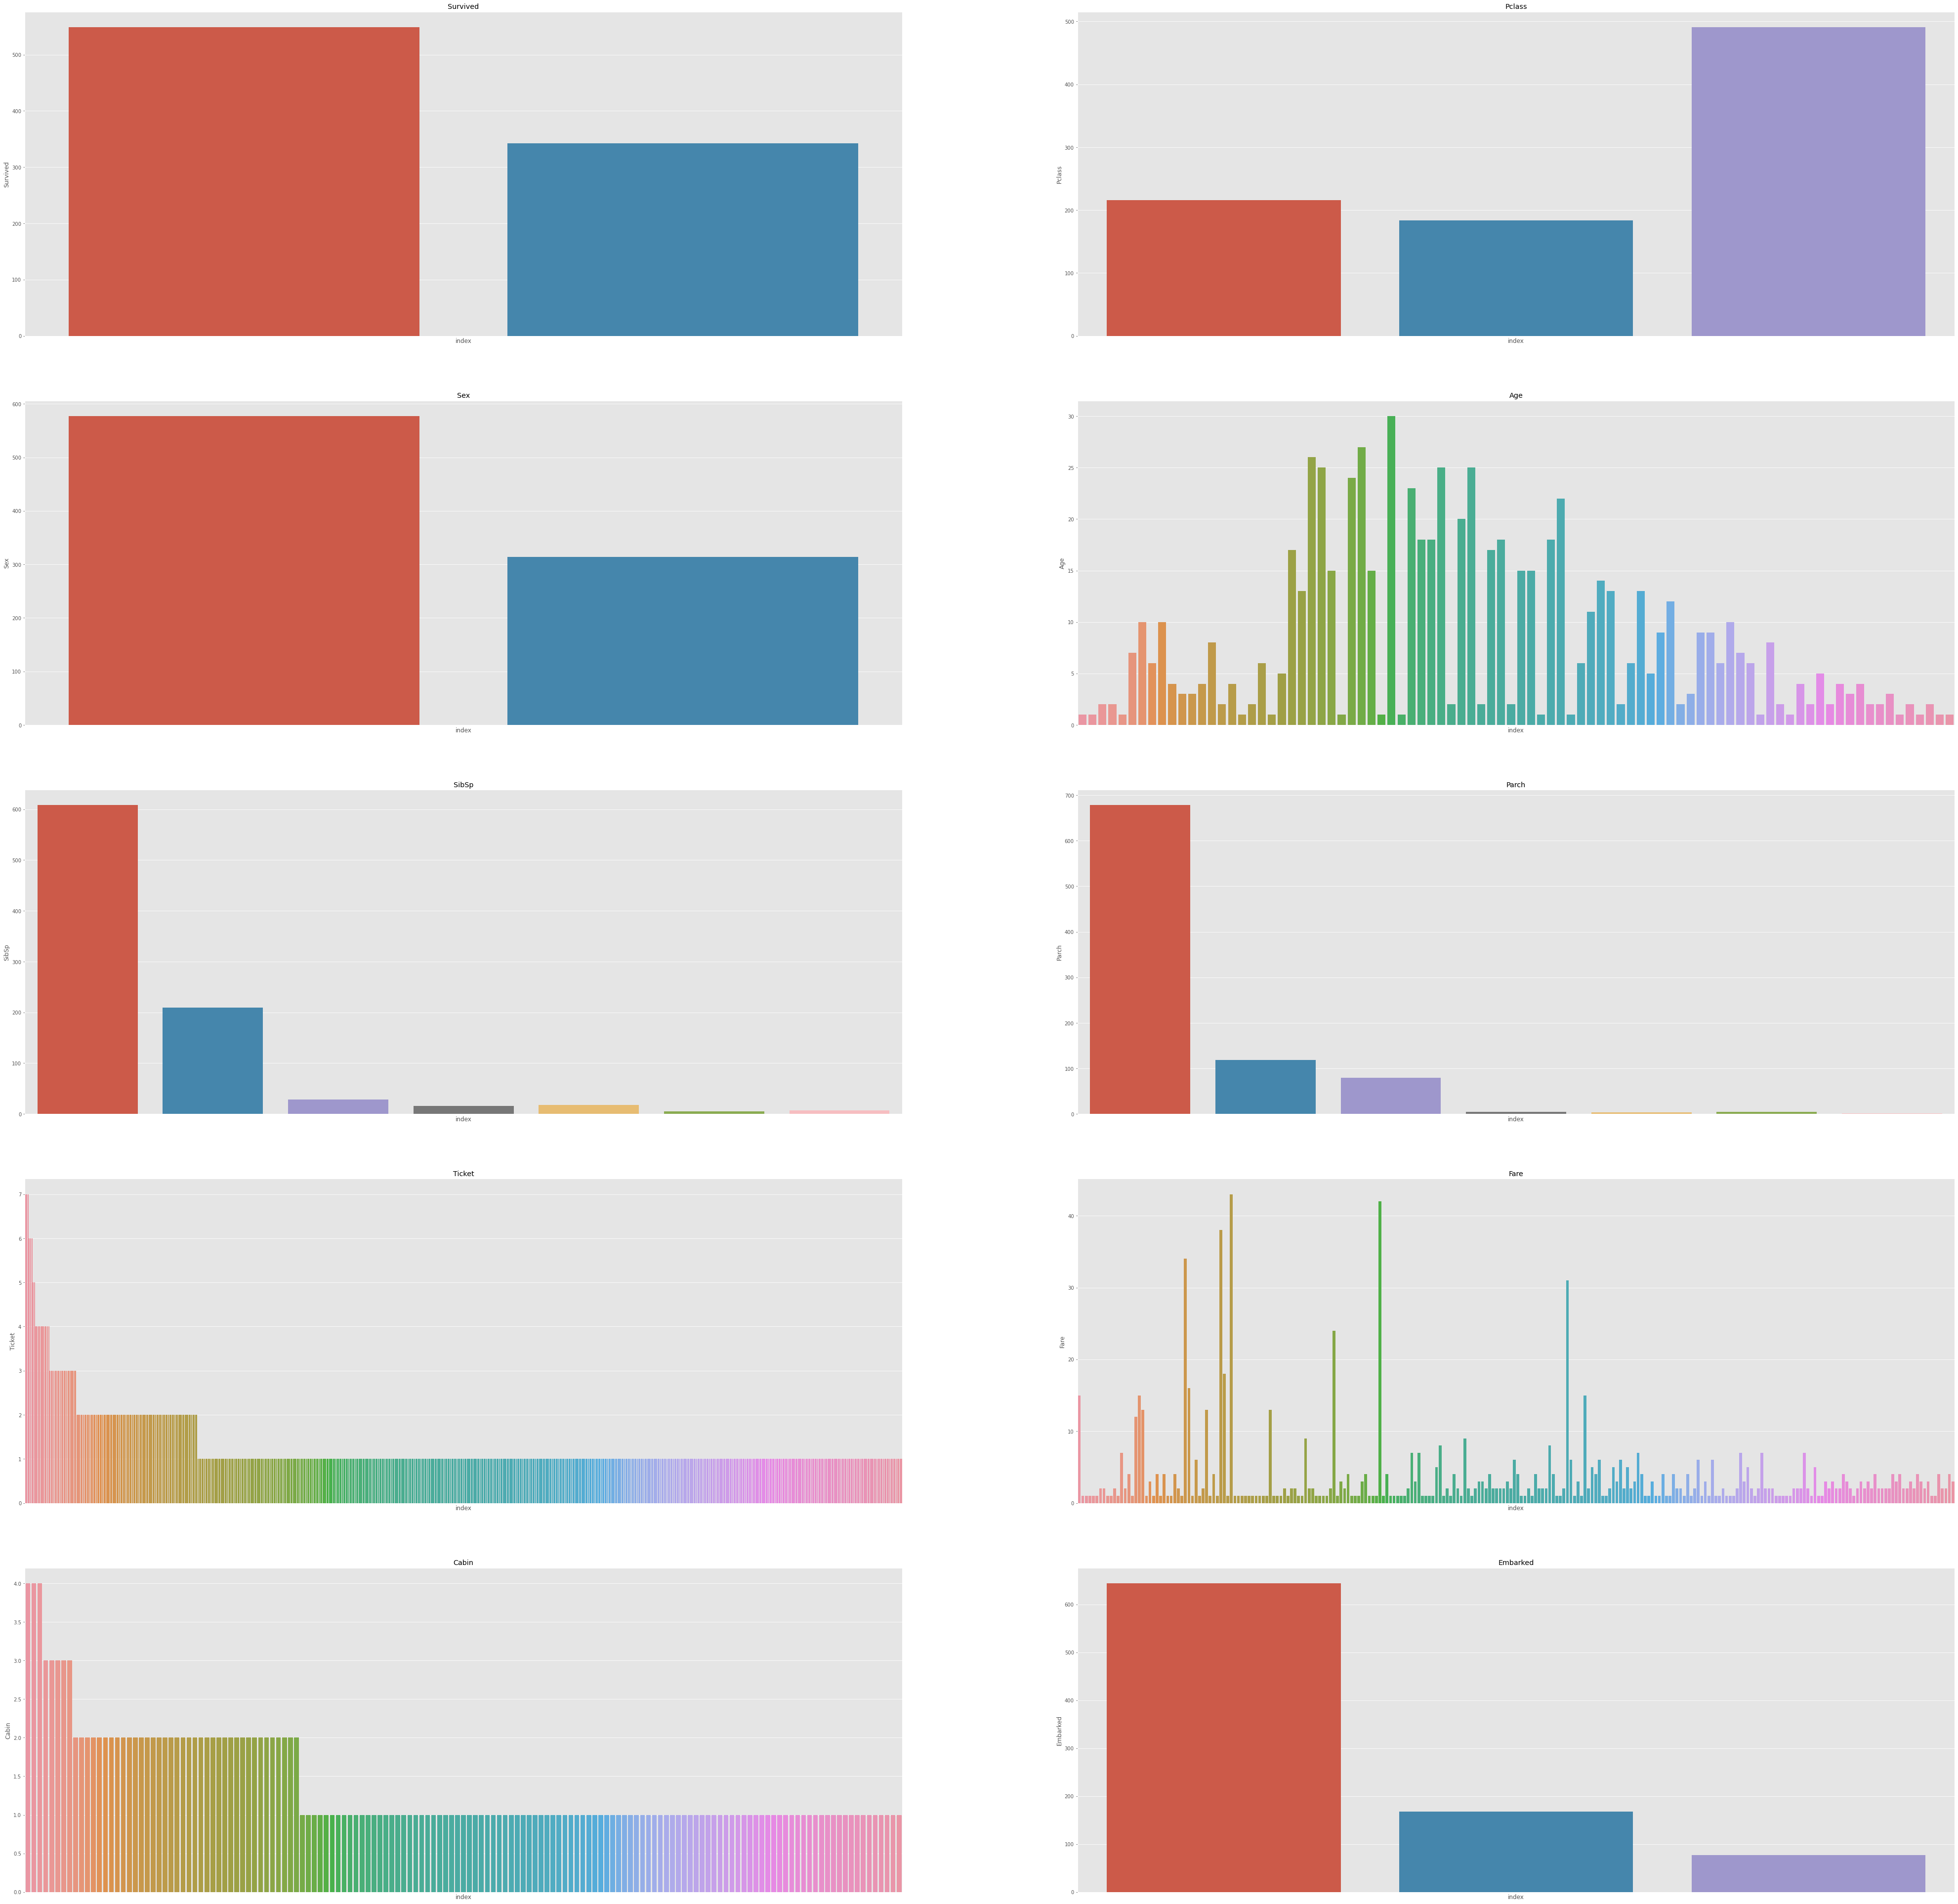

In [7]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
f, ax = plt.subplots(5, 2, figsize=(70, 70))
for i, c in enumerate(columns):
    g = sns.barplot(data=pd.DataFrame(train[c].value_counts()).reset_index(), x='index', y=c, ax=ax[i//2, i%2])
    g.set(xticks=[])
    g.set(title=c)

## Feature Engineering  

### Pclass  
We'll leave Pclass as is

### Name
We'll replace all the names with titles.  
Referencing: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [8]:
import string
def get_title(x):
    name_parts = x.split(',')
    title = name_parts[1].split('.')[0].strip()
    return title

In [9]:
train['Title'] = train['Name'].map(lambda x: get_title(x))

In [10]:
train.loc[train['Title'] == 'Don', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Major', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Capt', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Jonkheer', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Rev', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Col', 'Title'] = 'Mr'
train.loc[train['Title'] == 'Countess', 'Title'] = 'Mrs'
train.loc[train['Title'] == 'Mme', 'Title'] = 'Mrs'
train.loc[train['Title'] == 'Mlle', 'Title'] = 'Miss'
train.loc[train['Title'] == 'Ms', 'Title'] = 'Miss'
train.loc[(train['Title'] == 'Dr') & (train['Sex'] == 'male'), 'Title'] = 'Mr'
train.loc[(train['Title'] == 'Dr') & (train['Sex'] == 'female'), 'Title'] = 'Mrs'
train.loc[train['Title'] == 'the Countess', 'Title'] = 'Mrs'
train.loc[train['Title'] == 'Lady', 'Title'] = 'Miss'
train.loc[train['Title'] == 'Sir', 'Title'] = 'Mr'

In [11]:
train['Title'].value_counts()

Mr        537
Miss      186
Mrs       128
Master     40
Name: Title, dtype: int64

### Sex  
Can be left as a categorical feature

### Age  
First, lets fill the nan values.   
Then, we'll bin ages into 5-year categorical bins

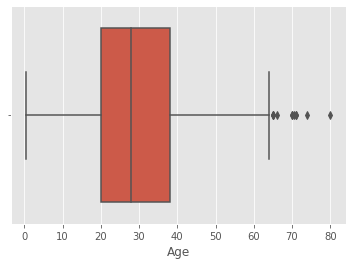

In [12]:
ax = sns.boxplot(x=train['Age'])

In [13]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [14]:
train.loc[train.Age <= 1.0, 'age_bins'] = '1s'
train.loc[(train['Age'] > 1.0) & (train['Age'] <= 5.0), 'age_bins'] = '5s'
train.loc[(train['Age'] > 5.0) & (train['Age'] <= 10.0), 'age_bins'] = '10s'
train.loc[(train['Age'] > 10.0) & (train['Age'] <= 15.0), 'age_bins'] = '15s'
train.loc[(train['Age'] > 15.0) & (train['Age'] <= 20.0), 'age_bins'] = '20s'
train.loc[(train['Age'] > 20.0) & (train['Age'] <= 25.0), 'age_bins'] = '25s'
train.loc[(train['Age'] > 25.0) & (train['Age'] <= 30.0), 'age_bins'] = '30s'
train.loc[(train['Age'] > 30.0) & (train['Age'] <= 35.0), 'age_bins'] = '35s'
train.loc[(train['Age'] > 35.0) & (train['Age'] <= 40.0), 'age_bins'] = '40s'
train.loc[(train['Age'] > 40.0) & (train['Age'] <= 45.0), 'age_bins'] = '45s'
train.loc[(train['Age'] > 45.0) & (train['Age'] <= 50.0), 'age_bins'] = '50s'
train.loc[(train['Age'] > 50.0) & (train['Age'] <= 55.0), 'age_bins'] = '55s'
train.loc[(train['Age'] > 55.0), 'age_bins'] = '60s'

In [15]:
train['age_bins'].value_counts()

30s    285
25s    122
20s     96
35s     88
40s     67
45s     47
60s     40
50s     39
5s      30
55s     24
10s     20
15s     19
1s      14
Name: age_bins, dtype: int64

### SibSp & Parch   
We'll create two new columns: relative_size and travelled_alone

In [16]:
train['relative_size'] = train['SibSp'] + train['Parch']
train.loc[train['relative_size'] > 0, 'travelled_alone'] = 0 #No
train.loc[train['relative_size'] == 0, 'travelled_alone'] = 1 #Yes

In [17]:
train['relative_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relative_size, dtype: int64

### Cabin  
Since Cabin had the most nan-values, we'll fill them with 0 and everything else will be 1 is not nan.

In [18]:
train['Cabin'].loc[~train['Cabin'].isnull()] = 1  
train['Cabin'].loc[train['Cabin'].isnull()] = 0 

B:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Embarked
We'll fill the nan values with the median value of S

In [19]:
train['Embarked'] = train['Embarked'].fillna('S')

### Fare

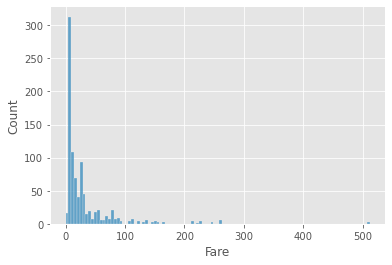

In [20]:
ax = sns.histplot(x=train['Fare'])
# plt.xlim(0, 100)

In [21]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

7.9104 31.0 23.0896


In [22]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print(lower_lim, upper_lim)

-26.724 65.6344


It looks like the Fare feature has several outliers since we see in values > 100 in the bar chart.   
Let's drop the rows with these outliers.

In [23]:
len(train.loc[(train['Fare'] > upper_lim)])

116

In [24]:
train = train.drop(train[(train['Fare'] > upper_lim)].index)

In [25]:
train.shape

(775, 16)

## Drop Columns
We don't need this column, so we can safely drop it.

In [26]:
train = train.drop(['PassengerId', 'Ticket', 'Name', 'Age'], axis=1)

In [27]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,age_bins,relative_size,travelled_alone
0,0,3,male,1,0,7.2500,0,S,Mr,25s,1,0.0
2,1,3,female,0,0,7.9250,0,S,Miss,30s,0,1.0
3,1,1,female,1,0,53.1000,1,S,Mrs,35s,1,0.0
4,0,3,male,0,0,8.0500,0,S,Mr,35s,0,1.0
5,0,3,male,0,0,8.4583,0,Q,Mr,30s,0,1.0


In [28]:
train['travelled_alone'] = train['travelled_alone'].astype(int)

In [29]:
train.reset_index(drop=True, inplace=True)

In [30]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,age_bins,relative_size,travelled_alone
0,0,3,male,1,0,7.2500,0,S,Mr,25s,1,0
1,1,3,female,0,0,7.9250,0,S,Miss,30s,0,1
2,1,1,female,1,0,53.1000,1,S,Mrs,35s,1,0
3,0,3,male,0,0,8.0500,0,S,Mr,35s,0,1
4,0,3,male,0,0,8.4583,0,Q,Mr,30s,0,1


## Now, let's do one-hot encodings for our categorical features:

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
data_obj = ohe.fit_transform(train[train.columns[train.dtypes=='object']])

obj_df = pd.DataFrame(data_obj,columns=ohe.get_feature_names(train.columns[train.dtypes=='object']))
cat_columns = obj_df.columns

train = pd.concat([train[train.columns[train.dtypes!='object']], obj_df], axis=1)

### Standarize the features

In [32]:
train = (train-train.min())/(train.max()-train.min())

## Check Feature Importance

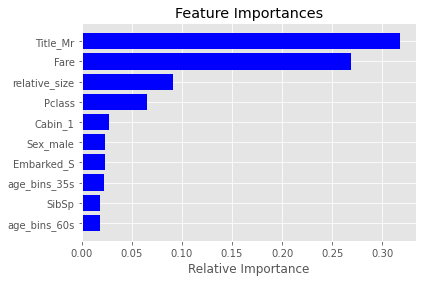

In [33]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop('Survived', axis=1)
y = train['Survived']

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Features Considered:
- Sex
- Pclass
- Fare
- Cabin
- age_bins
- relative_size
- Title

In [34]:
sex = [col for col in train.columns if 'Sex' in col]
cabin = [col for col in train.columns if 'Cabin' in col]
age_bins = [col for col in train.columns if 'age_bins' in col]
title = [col for col in train.columns if 'Title' in col]

features = ['Pclass', 'Fare', 'relative_size'] + sex + cabin + age_bins + title
train[features]

,Pclass,Fare,relative_size,Sex_male,Cabin_1,age_bins_15s,age_bins_1s,age_bins_20s,age_bins_25s,age_bins_30s,age_bins_35s,age_bins_40s,age_bins_45s,age_bins_50s,age_bins_55s,age_bins_5s,age_bins_60s,Title_Miss,Title_Mr,Title_Mrs
0,1.0,0.111538,0.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.121923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.816923,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.123846,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.130128,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.5,0.200000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
771,0.0,0.461538,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
772,1.0,0.360769,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
773,0.0,0.461538,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Let's break our dataset into Train and Test

In [35]:
from sklearn.model_selection import train_test_split

X = train[features]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Models

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

from sklearn import metrics

log_acc = logmodel.score(X_test, y_test)
log_pred = logmodel.predict(X_test)
print("Precision: %.2f%%" % (metrics.precision_score(y_test, log_pred)*100))
print("Recall: %.2f%%" % (metrics.recall_score(y_test, log_pred)*100))
print("Accuracy: %.2f%%" % (log_acc*100.0))

Precision: 86.36%
Recall: 71.70%
Accuracy: 86.45%


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 10, max_depth = 15)
rf.fit(X_train, y_train)

rf_acc = rf.score(X_test, y_test)
rf_pred = rf.predict(X_test)
print("Precision: %.2f%%" % (metrics.precision_score(y_test, rf_pred)*100))
print("Recall: %.2f%%" % (metrics.recall_score(y_test, rf_pred)*100))
print("Accuracy: %.2f%%" % (rf_acc*100.0))

Precision: 83.72%
Recall: 67.92%
Accuracy: 84.52%


## XGBoost

In [38]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label = y_train)
D_test = xgb.DMatrix(X_test, label = y_test)

param = {
    'eta': 0.5, 
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3}

steps = 50 

xgbc = xgb.train(param, D_train, steps)

[14:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = xgbc.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

xgbc_acc = accuracy_score(y_test, best_preds)

print("Precision: %.2f%%" % (metrics.precision_score(y_test, best_preds)*100))
print("Recall: %.2f%%" % (metrics.recall_score(y_test, best_preds)*100))
print("Accuracy: %.2f%%" % (xgbc_acc*100.0))

Precision: 94.87%
Recall: 69.81%
Accuracy: 88.39%


# Shapley

In [40]:
import shap

## Logistic Regression

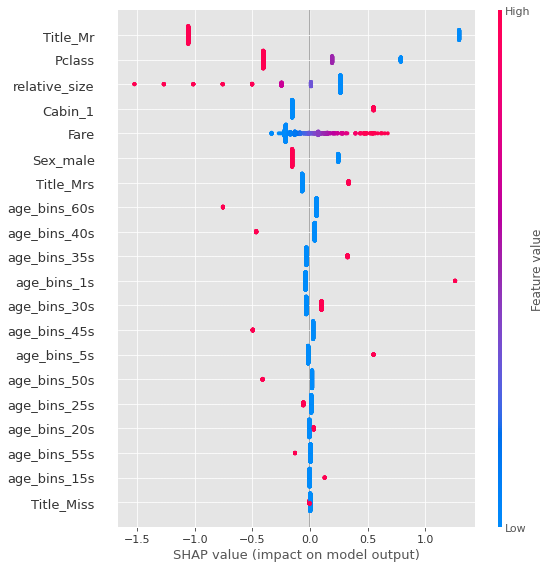

In [41]:
shap_values = shap.LinearExplainer(logmodel, X_train).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Random Forest

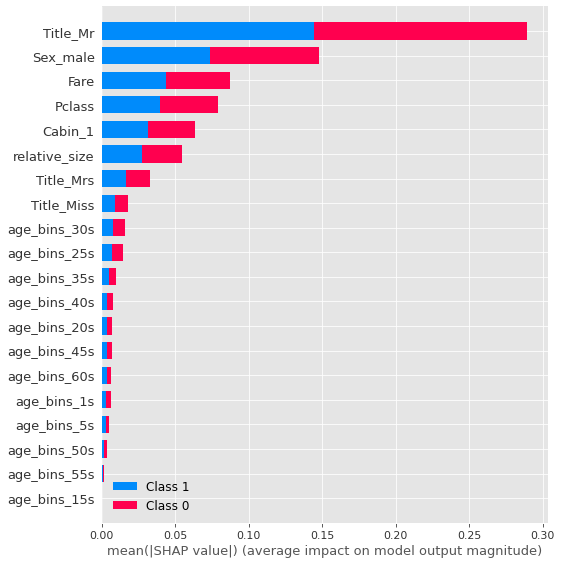

In [42]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## XGBoost

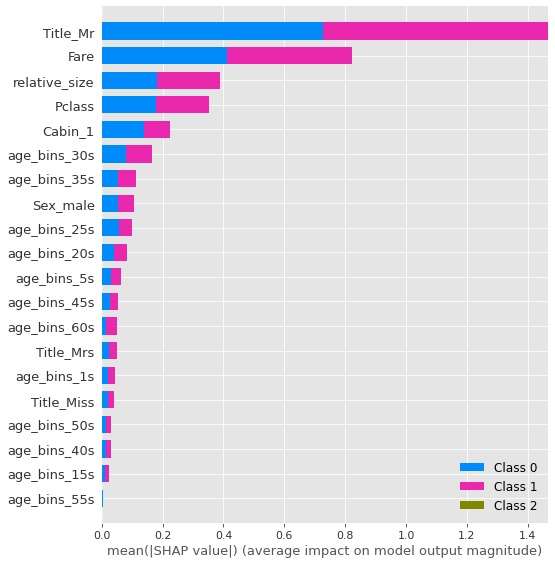

In [43]:
shap_values = shap.TreeExplainer(xgbc).shap_values(X_train)
shap.summary_plot(shap_values, X_train)